### metricas de desempeño de huber

#### Huber Loss

Es un modelo de regresión lineal que es mas robusto a valores atipicos

$$
\zeta \left( y - \hat{y} \right)^{2}  =

\begin{cases}

& \left( y - \hat{y} \right)^{2} ... \left| y - \hat{y}\right| \le \alpha 
\\
& \left| y - \hat{y} \right| ... \left| y - \hat{y} \right| \gt  \alpha 
\end{cases}
$$

donde y es la variable objetivo, ŷ son las predicciones correspondientes y α ∈ ℝ⁺ es un hiperparámetro. Es tentador ver esta pérdida como la función de probabilidad logarítmica de una distribución de error de cola pesada subyacente. De hecho, para errores absolutos menores que α , la distribución correspondiente se parece a la distribución normal, fuera de esta región coincide con la distribución de Laplace de colas más pesadas. Esta es precisamente la razón por la que esta pérdida es robusta frente a valores atípicos.

Eso es todo lo que necesitamos saber por ahora sobre la pérdida de Huber. Por lo tanto, saltemos directamente a los GLM, que se entienden mejor recordando primero los supuestos de la regresión lineal. En la regresión lineal, a menudo se supone que el término de error en la relación lineal entre la variable dependiente Y y algún vector de características X se distribuye normalmente con media cero y varianza constante σ², es decir, Y | X ~ X^ ⊤ β + ε siendo ε ∈ 𝓝(0,σ²) y β un conjunto de parámetros variacionales. Uno está interesado en encontrar la mejor estimación de β^ que minimice una función de costo cuadrática (correspondiente al logaritmo de verosimilitud de la distribución de ε). La estimación ŷ para un determinadoX es entonces simplemente ŷ ( X )=E[ Y | X ]= X^ ⊤ β ^ sombrero . Tenga en cuenta que (en una interpretación de máxima verosimilitud) la regresión de Huber reemplaza la distribución normal con una distribución de colas más pesadas pero aún asume una varianza constante.


Referencia : https://towardsdatascience.com/generalized-huber-regression-505afaff24c

### Area bajo la curva de ROC

El análisis de la curva ROC, o simplemente análisis ROC, proporciona herramientas para seleccionar los modelos posiblemente óptimos y descartar modelos subóptimos independientemente de (y antes de especificar) el coste de la distribución de las dos clases sobre las que se decide. La curva ROC es también independiente de la distribución de las clases en la población (en diagnóstico, la prevalencia de una enfermedad en la población). El análisis ROC se relaciona de forma directa y natural con el análisis de coste/beneficio en toma de decisiones diagnósticas.

las curvas ROC son útiles para:

$\bullet$ Conocer el rendimiento global de una prueba. Area bajo la curva.

$\bullet$ Comparar dos pruebas o dos puntos de corte. Comparación de dos curvas o de dos puntos sobre una curva.

### De binario a multiclase y multietiqueta

Algunas métricas se definen esencialmente para tareas de clasificación binaria. En estos casos, por defecto solo se evalúa la etiqueta positiva, asumiendo por defecto que la clase positiva está etiquetada 1

Al extender una métrica binaria a problemas multiclase o multietiqueta, los datos se tratan como una colección de problemas binarios, uno para cada clase. Luego, hay varias formas de promediar los cálculos de métricas binarias en el conjunto de clases, cada una de las cuales puede ser útil en algún escenario. Donde esté disponible, debe seleccionar entre estos usando el averageparámetro.

Referencia: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
import sklearn.metrics as sklm
import sklearn
import tensorflow as tf
import numpy as np
import matplotlib as plt
from sklearn.svm import SVC

class metrics():
    def __init__(self,y_true,y_pred):
        self.y_true=np.array(y_true)
        self.y_pred=np.array(y_pred)
        self.y_true_int=self.y_true.astype(int)
        self.y_pred_int=self.y_pred.astype(int)

    def error_cuadratico_medio(self):
        return sklm.mean_squared_error(self.y_true,self.y_pred) 

    def error_absoluto_medio(self):
        return sklm.mean_absolute_error(self.y_true,self.y_pred) 

    def exactitud(self):
        return sklm.accuracy_score(self.y_true_int,self.y_pred_int)    

    def matriz_de_confusion(self):
        return sklm.confusion_matrix(self.y_true_int,self.y_pred_int)  
    
    def presicion(self):
        return sklm.precision_score(self.y_true_int,self.y_pred_int, average=None)

    def exhaustividad(self):
        return sklm.recall_score(self.y_true_int, self.y_pred_int)  

    def f1_score(self):
        return sklm.f1_score(self.y_true_int, self.y_pred_int, average=None)   

    def f1_ponderado(self):
        return sklm.precision_recall_fscore_support(self.y_true_int,self.y_pred_int, beta=1)     

    def huber(self):       
        h=tf.keras.losses.Huber()
        return h(self.y_true_int,self.y_pred_int).numpy()

    def ROC(self):
        return sklm.roc_curve(self.y_true_int,self.y_pred_int, pos_label=2)

    def plot_matrizC(self):
        return sklm.ConfusionMatrixDisplay.from_predictions(self.y_true_int,self.y_pred_int)

    def plot_ROC(self):
        return sklearn.metrics.RocCurveDisplay.from_predictions(self.y_true_int, self.y_pred_int, pos_label = 2)          



        



In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
test= metrics(y_true,y_pred)
test.error_cuadratico_medio()

0.375

In [ ]:
test.error_absoluto_medio()

0.5

In [ ]:
test.exactitud()

0.5

In [ ]:
test.matriz_de_confusion()

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

In [ ]:
test.presicion()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1. , 0.5, 0. , 0. , 0. ])

In [ ]:
test.exactitud()

0.5

In [ ]:
test.f1_score()

array([1.        , 0.66666667, 0.        , 0.        , 0.        ])

In [ ]:
test.f1_ponderado()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([1. , 0.5, 0. , 0. , 0. ]),
 array([1., 1., 0., 0., 0.]),
 array([1.        , 0.66666667, 0.        , 0.        , 0.        ]),
 array([1, 1, 1, 1, 0]))

In [ ]:
test.huber()

0.25

In [ ]:
test.ROC()

(array([0.        , 0.33333333, 0.66666667, 1.        ]),
 array([0., 0., 1., 1.]),
 array([9, 8, 2, 0]))

In [ ]:
clf = SVC(random_state=0)
SVC(random_state=0)

SVC(random_state=0)

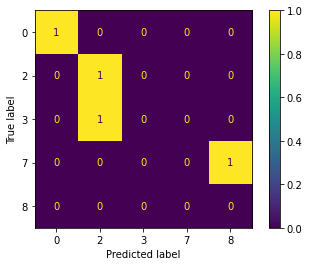

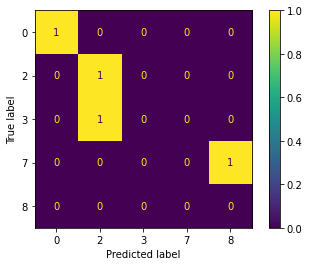

In [ ]:
c=test.plot_matrizC()
c.plot()



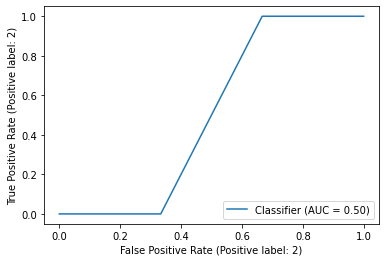

In [ ]:
test.plot_ROC()